In [11]:
ls

__init__.py          madden.pyc           picks/
__pycache__/         nfl.py               referencedata.py
aa_nfl_picker.py     nfl_bing_predict.py  referencedata.pyc
data/                nfl_picks.py         results/
external_data.py     nfl_picks.pyc        runMadden.py
external_data.pyc    nfl_picks2.py        walsh.py
ipynb/               nfl_picks2.pyc
madden.py            nohup.out


In [16]:
from madden import *
import madden
import pandas
import logging
import os
%matplotlib inline


In [17]:
MLNFL_ROOT_DIR = os.environ['MLNFL_ROOT']
print(MLNFL_ROOT_DIR)
codeDir = "".join([MLNFL_ROOT_DIR, os.path.sep])

dataRoot = "".join([codeDir, "data", os.path.sep])

dataRoot = "/Users/amitbhattacharyya/repos/mlkaggle/nfl/data/"

/Users/amitbhattacharyya/repos/mlnfl/nfl


In [18]:
lookupFiles = {'teams' : {'file': 'nflTeams.csv'}, 'seasons': {'file': 'seasons.csv'}, }

lookupDir = "".join([dataRoot, 'lookup', os.path.sep])

logging.info("lookupFiles = %s" % lookupFiles)
logging.info("lookupDir = %s" % lookupDir)

# load reference data
reference_data = ReferenceData(lookupDir)


 2018-09-27 18:49:22,647 - INFO - lookupFiles = {'teams': {'file': 'nflTeams.csv'}, 'seasons': {'file': 'seasons.csv'}}
 2018-09-27 18:49:22,649 - INFO - lookupDir = /Users/amitbhattacharyya/repos/mlkaggle/nfl/data/lookup/


In [19]:
season = 2018
if 1:
    # train on previous 3 yrs of data
    testYear = [season]
    trainYears = range(season-10,season)

    # training data set - includes one extra year for prev yr record
    seasons = np.array(trainYears)
 
    # get training data
    # 1 - read all the games
    path_to_lines = dataRoot + "lines/"
    df_all_historical_games = madden.readGamesAll(path_to_lines, seasons)
    # 2 - compile season record for all teams
    df_all_teams = madden.seasonRecord(df_all_historical_games, reference_data)
    # 3 - apply season records and compute other fields for all games
    df_all_historical_games = madden.processGames(df_all_historical_games, df_all_teams, reference_data)
    # 4 - remove extra year of data
    df_all_historical_games = df_all_historical_games[df_all_historical_games.season.isin(seasons)]

 

/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['gamesPlayed'] = range(1, len(team_df.index) + 1)  # index 1 thur 16
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_df['team'] = team
/Users/amitbhattacharyya/repos/mlnfl/nfl/madden.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [20]:
df_all_historical_games.columns

Index(['Date', 'Visitor', 'Visitor Score', 'Home Team', 'Home Score', 'Line',
       'Total Line', 'season', 'week', 'favorite', 'underdog',
       'favoredHomeGame', 'divisionGame', 'homeWin', 'favoredWin', 'gameWeek',
       'homeRecord', 'visitorRecord', 'favoredRecord', 'underdogRecord',
       'prevFavoredRecord', 'prevUnderdogRecord', 'absLine'],
      dtype='object')

In [21]:
seaosn_filter = df_all_historical_games.season >= 2015
df_lines_performance = df_all_historical_games[seaosn_filter].pivot_table(index='Line', values="homeWin", aggfunc=(len,sum))
df_lines_performance['pct'] = df_lines_performance['sum'] / df_lines_performance['len'] * 1.
df_lines_performance

,len,sum,pct
Line,,,
-13.0,1,0,0.000000
-11.0,1,1,1.000000
-10.5,5,2,0.400000
-10.0,2,1,0.500000
-9.5,6,0,0.000000
-9.0,4,0,0.000000
-8.5,3,0,0.000000
-8.0,2,0,0.000000
-7.5,9,2,0.222222


In [22]:
#df_lines_performance.drop([0], inplace=True)
df_lines_performance['pct_smooth'] = pandas.rolling_mean(df_lines_performance['pct'], 10 , center=True)
df_lines_performance['pct_smooth2'] = pandas.rolling_mean(df_lines_performance['pct_smooth'], 6 , center=True)
df_lines_performance['pct_smooth2_inv'] = 1 -  df_lines_performance['pct_smooth2']

/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
  
/Users/amitbhattacharyya/.virtualenvs/datascience3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=True).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


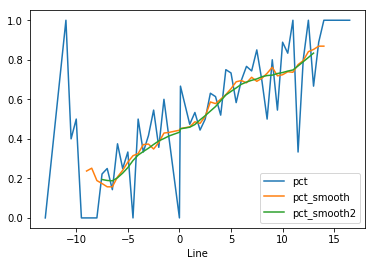

In [23]:
df_lines_performance[['pct','pct_smooth','pct_smooth2']].plot()

In [25]:
# map actual spreads to probabilities


In [27]:
df_recent = readGamesAll(path_to_lines, np.array([2018]))


In [28]:
week_filter = (df_recent.week == 4) & (df_recent.season == 2018)

df_picks = df_recent[week_filter].merge(df_lines_performance, left_on="Line", right_index=True)
df_picks

,Date,Visitor,Visitor Score,Home Team,Home Score,Line,Total Line,season,week,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv
9502,2018-09-27,Minnesota Vikings,NaN,Los Angeles Rams,NaN,6.5,NaN,2018,4.0,30,23,0.766667,0.683488,0.687210,0.312790
9503,2018-09-30,Cincinnati Bengals,NaN,Atlanta Falcons,NaN,5.5,NaN,2018,4.0,24,14,0.583333,0.688698,0.657495,0.342505
9504,2018-09-30,Tampa Bay Buccaneers,NaN,Chicago Bears,NaN,3.0,NaN,2018,4.0,65,41,0.630769,0.586587,0.540508,0.459492
9506,2018-09-30,Detroit Lions,NaN,Dallas Cowboys,NaN,3.0,NaN,2018,4.0,65,41,0.630769,0.586587,0.540508,0.459492
9515,2018-09-30,Baltimore Ravens,NaN,Pittsburgh Steelers,NaN,3.0,NaN,2018,4.0,65,41,0.630769,0.586587,0.540508,0.459492
9505,2018-09-30,Houston Texans,NaN,Indianapolis Colts,NaN,1.0,NaN,2018,4.0,19,9,0.473684,0.460604,0.458925,0.541075
9507,2018-09-30,Buffalo Bills,NaN,Green Bay Packers,NaN,10.0,NaN,2018,4.0,9,8,0.888889,0.724332,0.735456,0.264544
9508,2018-09-30,New York Jets,NaN,Jacksonville Jaguars,NaN,7.5,NaN,2018,4.0,20,17,0.850000,0.691034,0.703173,0.296827
9509,2018-09-30,Miami Dolphins,NaN,New England Patriots,NaN,7.0,NaN,2018,4.0,39,29,0.743590,0.711488,0.696025,0.303975
9510,2018-09-30,Philadelphia Eagles,NaN,Tennessee Titans,NaN,-4.0,NaN,2018,4.0,8,4,0.500000,0.325379,0.317958,0.682042


In [29]:
use_cols = ['Home Team', 'Visitor', 'Line', 'pct_smooth2', 'pct_smooth2_inv']
df_picks[use_cols].to_clipboard()

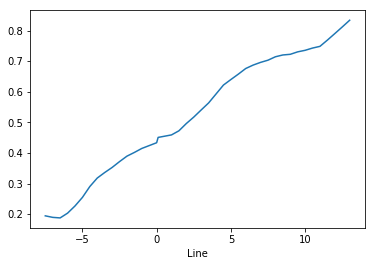

In [18]:
df_lines_performance.pct_smooth2.plot()


In [30]:
df_lines_performance[-5:5]

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv
Line,,,,,,
-5.0,6,2,0.333333,0.282341,0.254624,0.745376
-4.5,6,0,0.000000,0.314665,0.290249,0.709751
-4.0,8,4,0.500000,0.325379,0.317958,0.682042
-3.5,24,8,0.333333,0.371093,0.335944,0.664056
-3.0,60,25,0.416667,0.373593,0.352541,0.647459
-2.5,33,18,0.545455,0.348593,0.371647,0.628353
-2.0,14,5,0.357143,0.381926,0.389521,0.610479
-1.5,10,6,0.600000,0.429295,0.401629,0.598371
-1.0,25,10,0.400000,0.432628,0.414709,0.585291


In [46]:
df_lines_performance['sum'].sum() / df_lines_performance['len'].sum()

0.5598958333333334

In [53]:
df_lines_performance.drop([0])

,len,sum,pct,pct_smooth,pct_smooth2,pct_smooth2_inv
Line,,,,,,
-13.0,1,0,0.000000,NaN,NaN,NaN
-11.0,1,1,1.000000,NaN,NaN,NaN
-10.5,5,2,0.400000,NaN,NaN,NaN
-10.0,2,1,0.500000,NaN,NaN,NaN
-9.5,6,0,0.000000,NaN,NaN,NaN
-9.0,4,0,0.000000,0.237222,NaN,NaN
-8.5,3,0,0.000000,0.251508,NaN,NaN
-8.0,2,0,0.000000,0.189008,NaN,NaN
-7.5,9,2,0.222222,0.174008,0.194405,0.805595
